# CLASSIFICATION-- SEPSIS PREDICTION 

![Sepsis Technology Image](https://img.hcinnovationgroup.com/files/base/ebm/hci/image/2021/06/sepsis_tech.60d4da84d62da.png?auto=format,compress&fit=fill&fill=blur&w=1200&h=630)

# Introduction (What is Sepssis?)

Sepsis is a serious medical condition caused by an infection that can lead to organ dysfunction and even death. In the dataset, variables such as vital signs, blood markers of inflammation, age, gender, and length of hospital stay may be related to sepsis risk and used to predict the condition.

# Importation

In [236]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# # Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier, plot_importance
# from sklearn.metrics import roc_curve
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.cluster import KMeans

# # Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# # Evaluations
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
# from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
# from statistics import stdev
# from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [237]:
url = 'https://raw.githubusercontent.com/ikoghoemmanuell/Machine-Learning-API-using-FastAPI/main/Paitients_Files_Train.csv'
data = pd.read_csv(url)

# Exploratory Data Analysis: EDA

## Hypothesis

H0: The mean age of patients with sepsis is significantly higher than the mean age of patients without sepsis.

H1: There is no significant difference in the mean age of patients with and without sepsis.

## Questions

1. What is the distribution of sepsis cases in the dataset? 
2. How does plasma glucose level relate to the incidence of sepsis?
3. Are there any significant differences in blood pressure between patients who develop sepsis and those who do not?
4. Is there a relationship between the length of ICU stay and the likelihood of developing sepsis?
5. Are there any outliers in the dataset, and how do they affect the analysis?
6. Is there a significant difference in the age distribution between patients who develop sepsis and those who do not?

## Dataset overview

In [238]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [239]:
data.shape

(599, 11)

In [240]:
# summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [241]:
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [242]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Issues with the data

1. Too many zeros in each column
2. The column names are not very descriptive.
3. The target variable 'Sepssis' may have imbalanced classes.
4. There may be outliers in some of the numerical columns.
5. There could be correlations between some of the predictor variables, leading to multicollinearity.

## How I Intend to Solve Them

1. Replace zeros in each column with the median value
2. Rename the column names to be more descriptive and easier to understand.
3. Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.
4. Use visualization techniques such as box plots and scatter plots to identify and handle any outliers.
5. Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

In [243]:
data.columns.values

array(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age',
       'Insurance', 'Sepssis'], dtype=object)

In [244]:
# Rename the columns
data = data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_Result_1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_Result_2",
    "TS": "Blood_Work_Result_3",
    "M11": "BMI",
    "BD2": "Blood_Work_Result_4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

<AxesSubplot:xlabel='Plasma_glucose'>

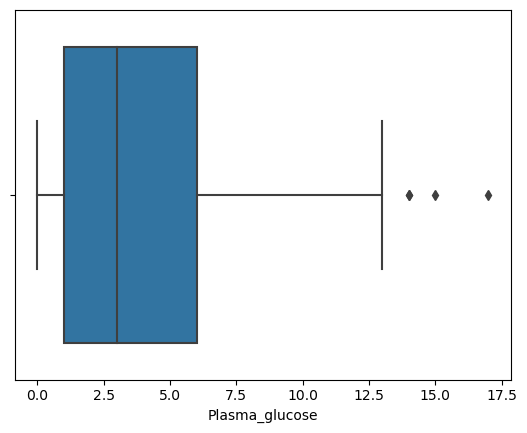

In [245]:
# Handle outliers in numerical columns
sns.boxplot(x=data['Plasma_glucose'])

<AxesSubplot:xlabel='Blood_Pressure'>

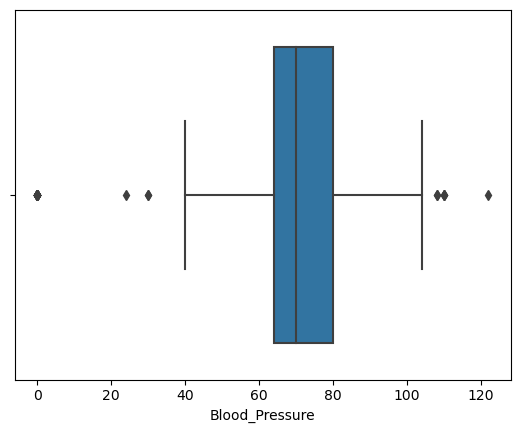

In [246]:
sns.boxplot(x=data['Blood_Pressure'])

<AxesSubplot:xlabel='BMI'>

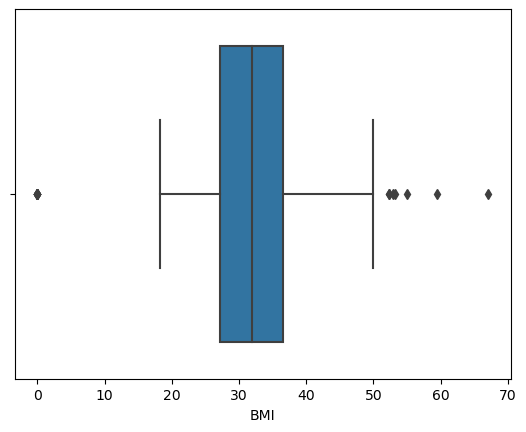

In [247]:
sns.boxplot(x=data['BMI'])

In [248]:
data.describe()

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [279]:
# Separate the the numerical columns
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categoric_features = data.select_dtypes(include=['object']).columns.tolist()

In [249]:
# compare the total count for each column with the count of zeros
for col in numerical_features:
    zeros_count = (data[col] == 0).sum()
    total_count = data[col].count()
    print(f"Total count: {total_count}, Zeros_count: {zeros_count} Column: {col}")

Total count: 599, Zeros_count: 93 Column: Plasma_glucose
Total count: 599, Zeros_count: 5 Column: Blood_Work_Result_1
Total count: 599, Zeros_count: 28 Column: Blood_Pressure
Total count: 599, Zeros_count: 175 Column: Blood_Work_Result_2
Total count: 599, Zeros_count: 289 Column: Blood_Work_Result_3
Total count: 599, Zeros_count: 9 Column: BMI
Total count: 599, Zeros_count: 0 Column: Blood_Work_Result_4
Total count: 599, Zeros_count: 0 Column: Patient_age
Total count: 599, Zeros_count: 188 Column: Insurance


In [250]:
# Replace zeros in each column with the median value
for col in numerical_features:
    data[col].replace(to_replace=0, value=data[col].median(), inplace=True)

In [251]:
data.describe()

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance
count,599.000000,599.00000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.0
mean,4.290484,121.12187,72.005008,27.282137,96.829716,32.400835,0.481187,33.290484,1.0
std,2.987000,30.76739,11.917146,9.451984,105.589923,6.968917,0.337552,11.828446,0.0
min,1.000000,44.00000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.00000,64.000000,23.000000,36.000000,27.400000,0.248000,24.000000,1.0
50%,3.000000,116.00000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.0
75%,6.000000,140.00000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.0
max,17.000000,198.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


In [252]:
# def count_zeros(columns)
# d = (data['Plasma_glucose']==0).sum()
# print(d, (data['Plasma_glucose']!=0).sum())

The results above showed there are many outliers

To deal with outliers in the dataset, we can use various techniques such as:

Winsorization: replace the extreme values with the nearest non-outlier value.
Trimming: remove the extreme values from the dataset.
Transformation: apply mathematical transformations such as logarithm or square root to the data to make the distribution more symmetric.

In [253]:
# drop Insurance from numerical_features since it has no outliers
outlier_features = [col for col in numerical_features if col != 'Insurance']

for col in outlier_features:
    # Perform Shapiro-Wilk test
    stat, p = shapiro(data[col])
    
    # Print the result
    if p > 0.05:
        print(f"{col} is normally distributed (p-value={p})")
    else:
        print(f"{col} is not normally distributed (p-value={p})")

Plasma_glucose is not normally distributed (p-value=4.3931711774501185e-21)
Blood_Work_Result_1 is not normally distributed (p-value=5.198173558262909e-10)
Blood_Pressure is not normally distributed (p-value=2.782979208859615e-06)
Blood_Work_Result_2 is not normally distributed (p-value=2.564007402032404e-18)
Blood_Work_Result_3 is not normally distributed (p-value=1.4404240533682491e-33)
BMI is not normally distributed (p-value=6.2934994105035e-08)
Blood_Work_Result_4 is not normally distributed (p-value=1.4773411337972998e-24)
Patient_age is not normally distributed (p-value=1.0750616611191123e-21)


In [278]:
# Check for outliers by applying the IQR method checking
df = data[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()


Plasma_glucose          True
Blood_Work_Result_1    False
Blood_Pressure          True
Blood_Work_Result_2     True
Blood_Work_Result_3     True
BMI                     True
Blood_Work_Result_4     True
Patient_age             True
Insurance              False
dtype: bool

we cannot use winsorization since the data is not normally distributed


In [255]:
# # Define the threshold for identifying outliers
# outlier_threshold = 2

# # Iterate over each numeric column
# for col in outlier_features:
#     # Calculate the mode of the column
#     col_median = data[col].median()
    
#     # Identify the outliers based on the threshold
#     outliers = data[col] > outlier_threshold
    
#     # Replace the outliers with the mode value
#     data.loc[outliers, col] = col_median

In [256]:
# # Specify the proportion of data to trim from each end (e.g. 3%)
# trim_pct = 0.1

# # Convert the DataFrame to a NumPy array
# data_array = data[outlier_features].to_numpy()

# # Apply Winsorization to replace outliers with the mean or median
# trimmed_data = mstats.winsorize(data_array, limits=trim_pct)

# # Convert the trimmed_data back to a DataFrame
# trimmed_df = pd.DataFrame(trimmed_data, columns=data[outlier_features].columns)

# # Replace the numerical variables in the original data with the trimmed data
# data[outlier_features] = trimmed_df[outlier_features]

# # Print the replaced values
# print(data)

In [257]:
# # Trim the data using the trim_mean function from scipy.stats
# trimmed_data = data[outlier_features].apply(lambda x: trim_mean(x, trim_pct), axis=0)

# # replace the numerical features with trimmed data
# data[outlier_features] = trimmed_data[outlier_features]

In [258]:
# # Specify the proportion of data to trim from each end (e.g. 5%)
# trim_pct = 0.03

# # Trim the data using the trim_mean function from scipy.stats
# trimmed_data = df.apply(lambda x: trim_mean(x, trim_pct), axis=0)

# # Compare the trimmed and untrimmed means
# print(f"Untrimmed mean: {data.mean()}")
# print(f"Trimmed mean: {trimmed_data}")

In [259]:
df = data[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

Plasma_glucose          True
Blood_Work_Result_1    False
Blood_Pressure          True
Blood_Work_Result_2     True
Blood_Work_Result_3     True
BMI                     True
Blood_Work_Result_4     True
Patient_age             True
Insurance              False
dtype: bool

<AxesSubplot:>

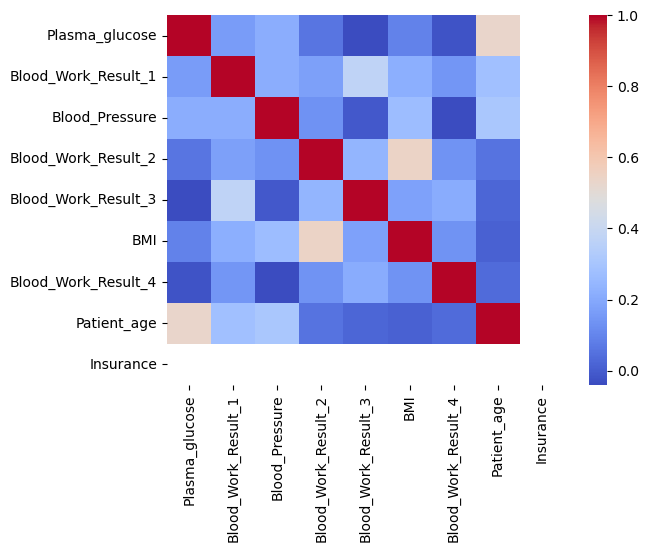

In [260]:
# Check for multicollinearity between predictor variables
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm')

## Data Imbalance Check

<AxesSubplot:xlabel='Target', ylabel='count'>

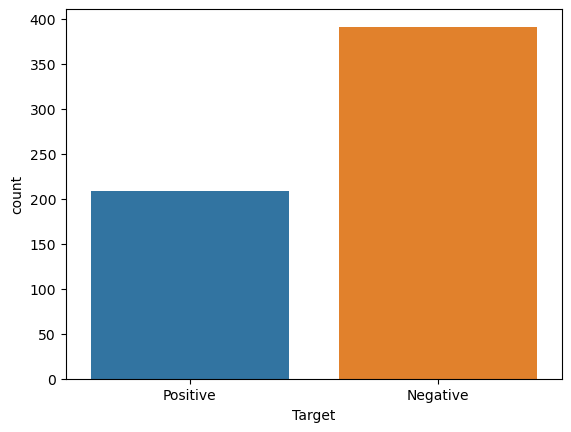

In [261]:
# Handle imbalanced classes in the target variable
sns.countplot(x='Target', data=data)

## Drop Duplicates

In [262]:
data.duplicated().sum()

0

## Impute Missing Values

In [266]:
data.isnull().sum()

ID                     0
Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
BMI                    0
Blood_Work_Result_4    0
Patient_age            0
Insurance              0
Target                 0
dtype: int64

## Univariate Analysis

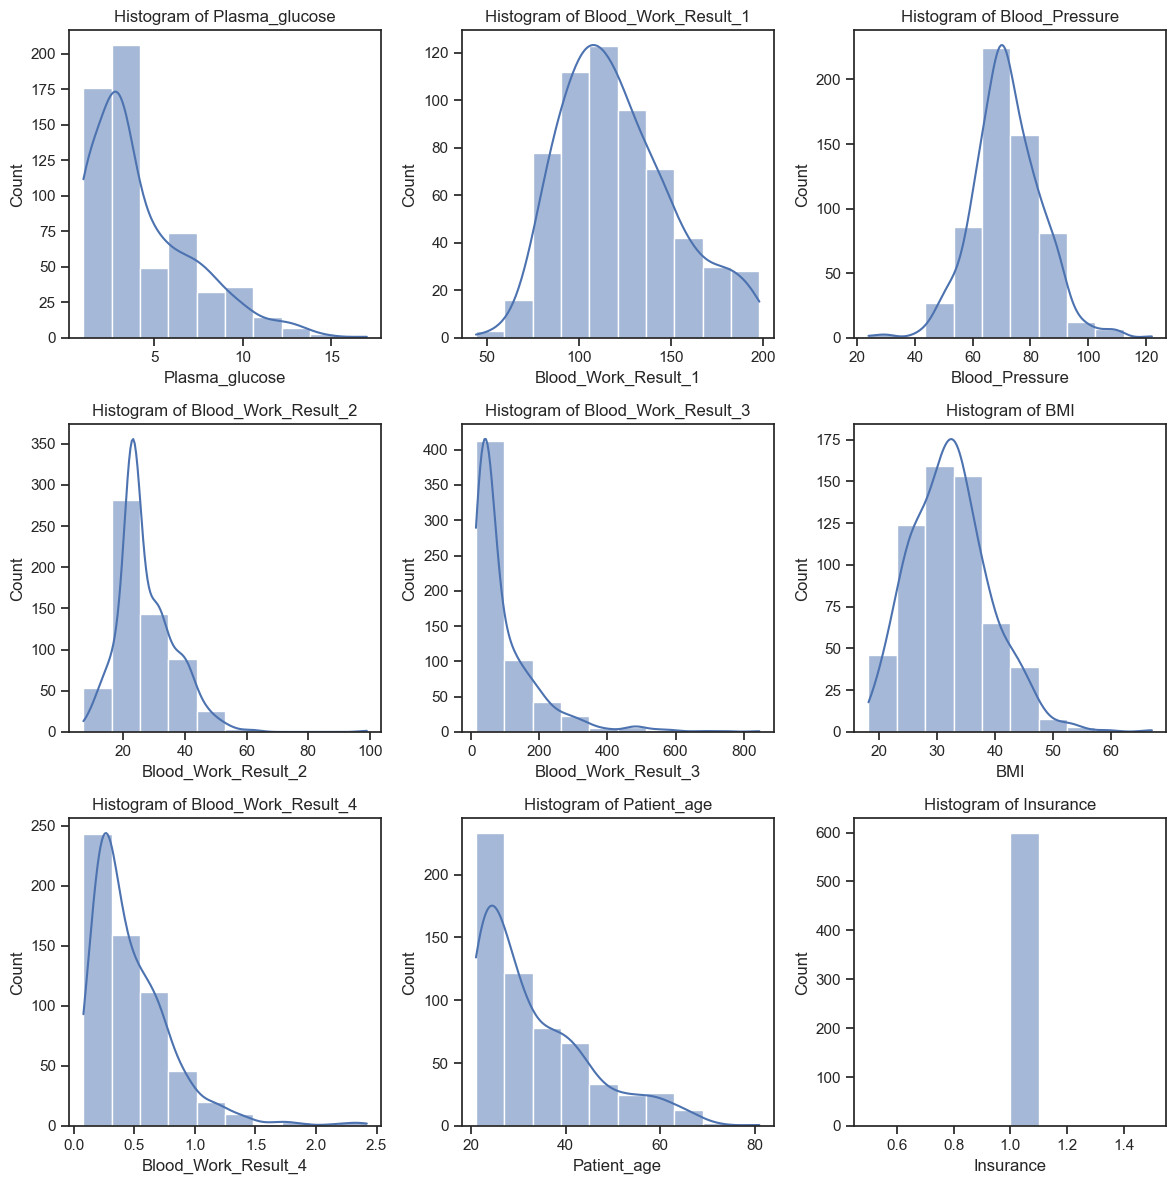

In [285]:
# Set the style for the plot
sns.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_features):
    sns.histplot(data=data, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Bivariate Analysis

## Multivariate Analysis

## Hypothesis validation

## Anwering Questions

## 1. Does longer tenure increase churn?
customers with longer tenure have less churn rate.

KeyError: 'Churn'

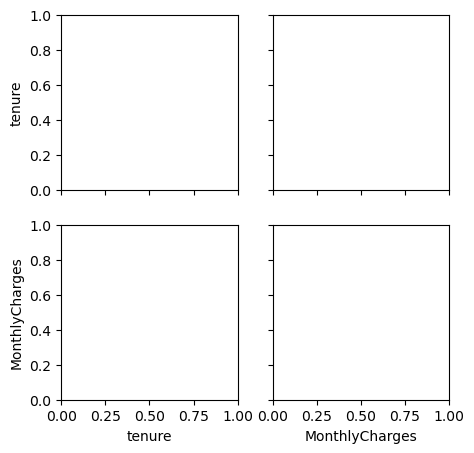

In [265]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges'], hue="Churn")

## 2. Is there any pattern in Customer Churn based on gender?
The plot below shows that churn for both genders is very similar.

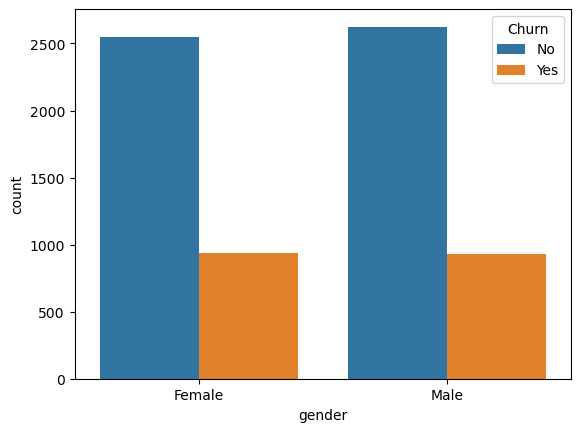

In [ ]:
sns.countplot(data = data, 
              x = 'gender', 
              hue = 'Churn')
plt.show()

## 3. Which type of contract keeps more customers?
Churn rate for month-to-month contracts much higher that for other contract durations.

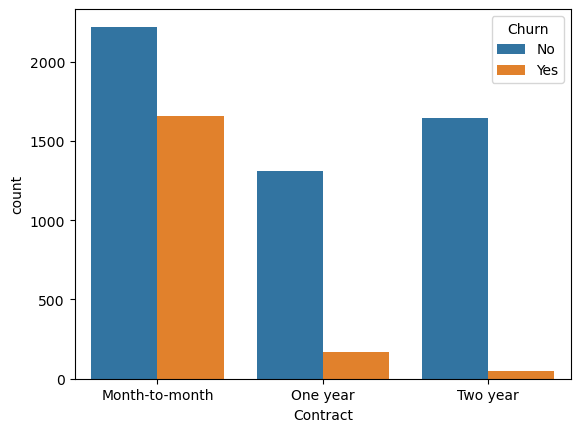

In [ ]:
sns.countplot(data = data, 
              x = 'Contract', 
              hue = 'Churn')
plt.show()

## 4. What's the most profitable Internetservice type
FiberOptic InternetService keeps more customers

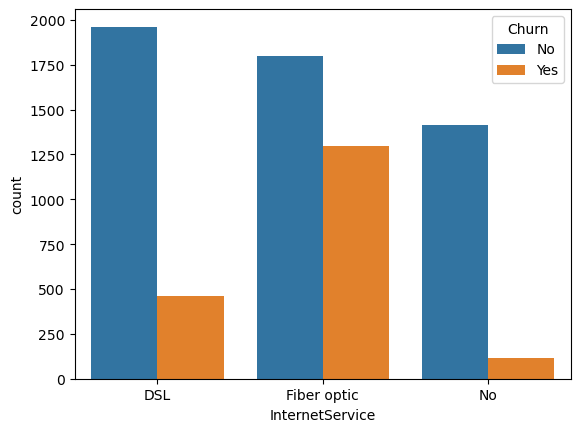

In [ ]:
sns.countplot(data = data, 
              x = 'InternetService', 
              hue = 'Churn')
plt.show()

# Feature Processing & Engineering

## Creating new features
Some columns are related to each other, so we'll add them together to avoid having unnecessary features

In [ ]:
data["PhoneService"] = data.apply(lambda x: 
                                  "MultipleLines" 
                                  if x['MultipleLines'] == 'Yes' and x['PhoneService'] == 'Yes'
                                  else 
                                  "SingleLine" 
                                  if x['MultipleLines'] == 'No' and x['PhoneService'] == 'Yes'
                                  else 
                                  "Nope", 
                                  axis=1
                                  )
data['PhoneService'].unique()

array(['Nope', 'SingleLine', 'MultipleLines'], dtype=object)

In [ ]:
data["StreamingService"] = data.apply(lambda x: 
                                  "FullService" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "TV" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'No'
                                  else 
                                  "Movies" 
                                  if x['StreamingTV'] == 'No' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "Nope", 
                                  axis=1
                                  )
data["StreamingService"].unique()

array(['Nope', 'FullService', 'TV', 'Movies'], dtype=object)

In [ ]:
data["SecurityService"] = data.apply(lambda x: 
                                  "FullSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'Yes'
                                  else 
                                  "OnlineSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'No'
                                  else 
                                  "DeviceProtection" 
                                  if x['OnlineSecurity'] == 'No' and x['DeviceProtection'] == 'Yes'
                                  else
                                  "Nope", 
                                  axis=1
                                  )
data["SecurityService"].unique()

array(['Nope', 'FullSecurity', 'OnlineSecurity', 'DeviceProtection'],
      dtype=object)

the SeniorCitizen column is 0 or 1 instead of No or Yes, so we change the category names accordingly

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [ ]:
#drop the original features
drop_features = ['MultipleLines', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'DeviceProtection']
data.drop(drop_features, axis=1, inplace=True)

## Impute Missing Values

In [ ]:
# Drop the missing rows
data = data.dropna(subset = ['TotalCharges'])

In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineBackup        0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
StreamingService    0
SecurityService     0
dtype: int64

In [ ]:
le = LabelEncoder()
df=data
df[['Target']] = df[['Target']].apply(le.fit_transform) # Applying LabelEncoder to 'Target' column

X = df.drop('Churn', axis=1)
y = df['Churn']

## Data Imbalance Check

<AxesSubplot:xlabel='Target', ylabel='count'>

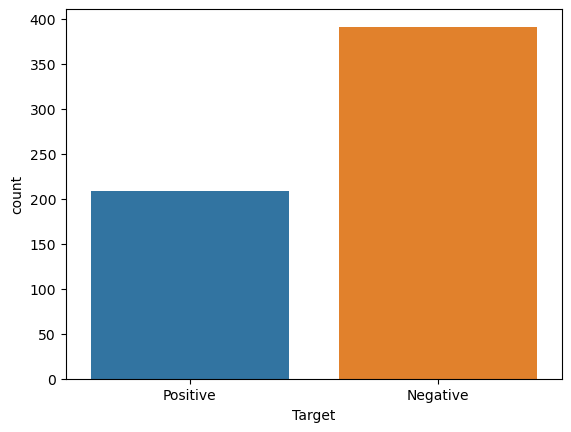

Dataset is imbalanced with almost 1:4 ratio. but it's still significant.

This means that a blind guess (on "Not-Churn") would give us accuracy of 73,51%

Therefore, we can't use Accuracy Score to choose our model

what to do to solve this issue:

1. We could use stratified splitting during train-test split (split the dataset in a way that preserves the same proportions of examples in each class.)
2. We could be extra careful when dealing with outliers (we can delete meaningull information).
3. Resampling Techniques — Oversample minority class or Undersample majority class.

In [ ]:
#Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 10306
Original dataset shape Counter({0: 5153, 1: 1857})
Resampled dataset shape Counter({0: 5153, 1: 5153})


Now our data is balanced

In [ ]:
X_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingService,SecurityService
0,Female,No,Yes,No,1,Nope,DSL,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,Nope,Nope
1,Male,No,No,No,34,SingleLine,DSL,No,No,One year,No,Mailed check,56.95,1889.50,Nope,FullSecurity
2,Male,No,No,No,2,SingleLine,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Nope,OnlineSecurity
3,Male,No,No,No,45,Nope,DSL,No,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Nope,FullSecurity
4,Female,No,No,No,2,SingleLine,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Nope,Nope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10301,Male,Yes,No,No,37,MultipleLines,Fiber optic,No,No,Month-to-month,Yes,Electronic check,101.10,3744.05,FullService,DeviceProtection
10302,Female,Yes,No,No,54,MultipleLines,DSL,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.10,FullService,OnlineSecurity
10303,Female,Yes,No,No,16,MultipleLines,Fiber optic,No,No,Month-to-month,Yes,Electronic check,84.75,1350.15,TV,Nope
10304,Female,Yes,No,No,47,MultipleLines,Fiber optic,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,4504.55,TV,Nope


In [ ]:
X_new.describe()

,tenure,MonthlyCharges,TotalCharges
count,10306.000000,10306.000000,10306.000000
mean,27.890355,67.799554,2045.909004
std,23.957560,28.742633,2177.657455
min,1.000000,18.250000,18.800000
25%,5.000000,45.462500,292.800000
50%,21.000000,74.500000,1164.300000
75%,49.000000,90.600000,3248.937500
max,72.000000,118.750000,8684.800000


# Dataset Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((8244, 16), (2062, 16), (8244,), (2062,))

# Features Encoding

In [ ]:
# Create both numerical and categorical columns
columns = list(df.columns)

categoric_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()


numeric_columns.remove('Churn') # Excluding 'Churn'

In [ ]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'StreamingService', 'SecurityService'],
      dtype='object')


In [ ]:
print(categoric_columns)
print(numeric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'StreamingService', 'SecurityService']
['tenure', 'MonthlyCharges', 'TotalCharges']


Let's use OneHotEncoder to encode the categorical columns except churn for which we already used labelEncoder

use drop='first' to handle multicollinearity that we mentioned earlier

we want our output to be a DataFrame instead of setting it manually (sklearn version 1.2.1)

In [ ]:
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
X_catEncoded_train = encoder.fit_transform(X_train[categoric_columns])

Encoding our test data with the same steps

In [ ]:
# encoding our test data
X_catEncoded_test = encoder.transform(X_test[categoric_columns])

# Features Scaling


In [ ]:
X_train[numeric_columns].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
Scaler = StandardScaler().fit(X_train[numeric_columns]).set_output(transform="pandas")

X_numScaled_train = Scaler.transform(X_train[numeric_columns])
X_numScaled_test = Scaler.transform(X_test[numeric_columns])

joining cat with num

In [ ]:
X_train = pd.concat([X_numScaled_train, X_catEncoded_train], axis=1)
X_test = pd.concat([X_numScaled_test, X_catEncoded_test], axis=1)

In [ ]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Nope,PhoneService_SingleLine,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingService_Movies,StreamingService_Nope,StreamingService_TV,SecurityService_FullSecurity,SecurityService_Nope,SecurityService_OnlineSecurity
591,1.472798,0.546970,1.564017,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
221,1.807796,-1.499351,-0.093879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8288,-0.997811,-0.783574,-0.849518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7897,-0.704688,-1.666539,-0.841317,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7467,-1.081561,-0.633801,-0.887417,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.054051,-1.670023,-0.456643,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,1.054051,-0.255885,0.526939,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,1.514673,1.086850,1.997509,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-0.327816,0.203884,-0.265930,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Machine Learning Modeling

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier


## 1.  Logistic Regression

### Create the Model

In [ ]:
model= LogisticRegression()

### Train the Model

In [ ]:
model=model.fit(X_train, y_train)


###  Predict on the test dataset

In [ ]:
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


### Model Evaluation

In [ ]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)
     

recall_score :  0.7933723196881092
precision_score : 0.7427007299270073
f1_score : 0.767200754005655
f2_score : 0.7826923076923078
accuracy_score : 0.7604267701260912
ROC_AUC Score: 0.76161951610222


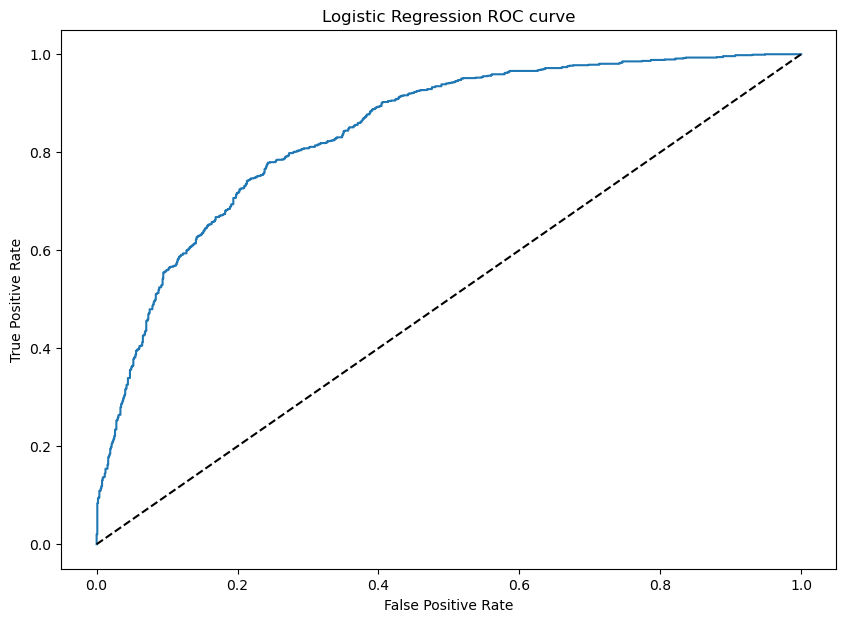

In [ ]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 2. RandomForest Classifier

### Create the Model

In [ ]:
RF_model= RandomForestClassifier()

### Train the Model

In [ ]:
RF_model= RF_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.9522417153996101
precision_score : 0.8585237258347979
f1_score : 0.9029574861367836
f2_score : 0.9318962228157193
accuracy_score : 0.8981571290009699
ROC_AUC Score: 0.9027467114022475


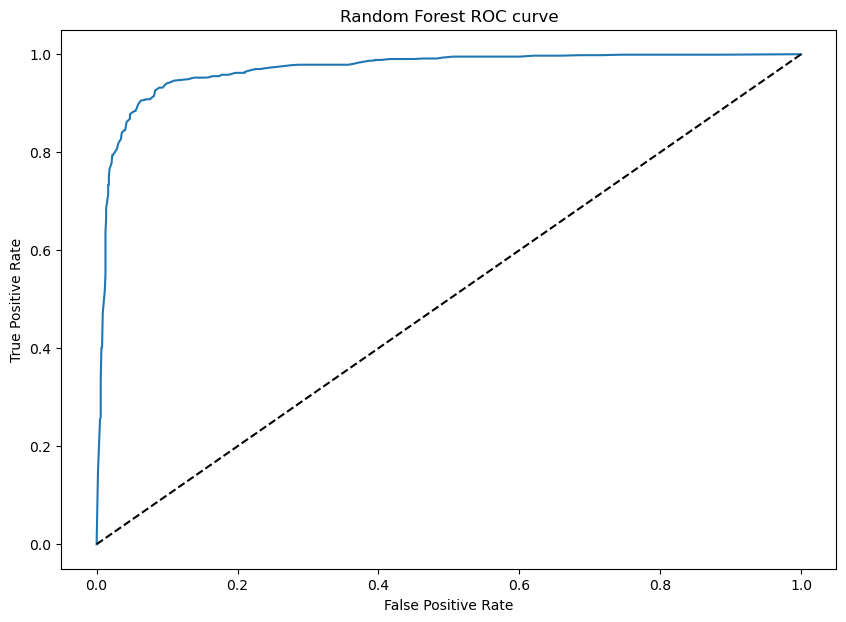

In [ ]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 3. XGBoost Classifier

### Create the Model

In [ ]:
XG_model= XGBClassifier()

### Train the Model

In [ ]:
XG_model= XG_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

f2_XG = fbeta_score(y_test, XG_pred, beta=2, average='binary')
print("f2_score :", f2_XG)


A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)
     

recall_score :  0.928849902534113
precision_score : 0.8145299145299145
f1_score : 0.8679417122040073
f2_score : 0.903488813045127
accuracy_score : 0.8593598448108632
ROC_AUC Score: 0.8663456747537465


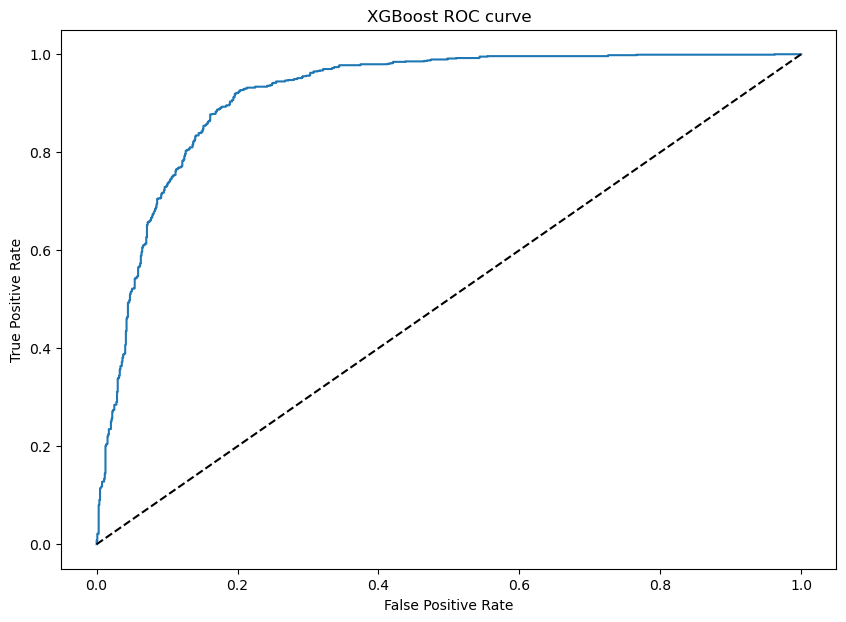

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, XG_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 4. K Nearest Neighbors


### Create the Model

In [ ]:
KNN_model = KNeighborsClassifier()


### Train the Model

In [ ]:
KNN_model = KNN_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_KNN= recall_score(y_test, KNN_pred)
print("recall_score : ", r_KNN)

p_KNN= precision_score(y_test, KNN_pred)
print("precision_score :",p_KNN)

f1_KNN= f1_score(y_test, KNN_pred)
print("f1_score :", f1_KNN)

f2_KNN = fbeta_score(y_test, KNN_pred, beta=2, average='binary')
print("f2_score :", f2_KNN)


A_KNN= accuracy_score( y_test, KNN_pred)
print("accuracy_score :", A_KNN)

acu_KNN = roc_auc_score(KNN_pred, y_test)
print("ROC_AUC Score:",acu_KNN)

recall_score :  0.8645224171539961
precision_score : 0.7354892205638475
f1_score : 0.7948028673835126
f2_score : 0.8352165725047082
accuracy_score : 0.7778855480116392
ROC_AUC Score: 0.786553021496877


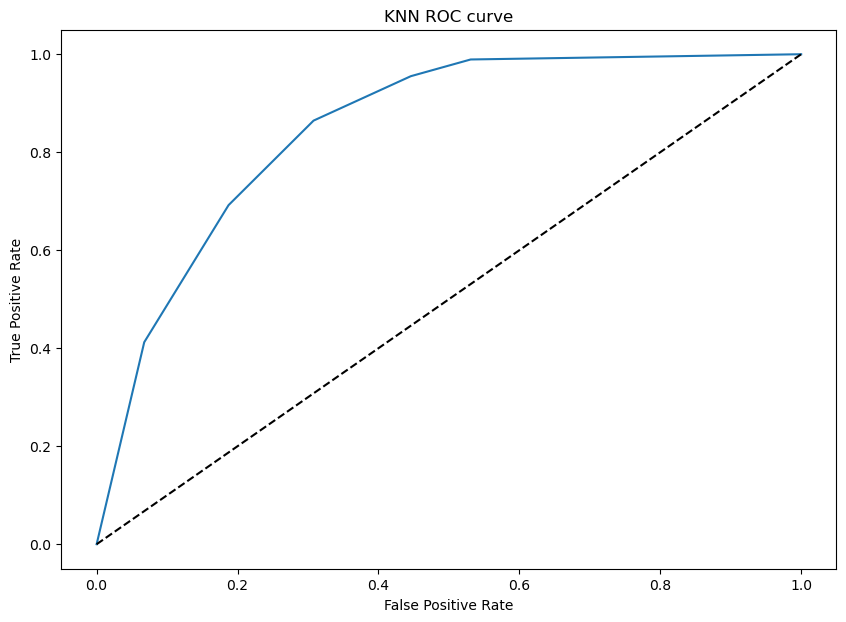

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, KNN_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 5. Support Vector Machines

### Create the Model

In [ ]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

### Train the Model

In [ ]:
SVC_model = SVC_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
SVC_pred = SVC_model.predict(X_test)
SVC_prob = SVC_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_SVC= recall_score(y_test, SVC_pred)
print("recall_score : ", r_SVC)

p_SVC= precision_score(y_test, SVC_pred)
print("precision_score :",p_SVC)

f1_SVC= f1_score(y_test, SVC_pred)
print("f1_score :", f1_SVC)

f2_SVC = fbeta_score(y_test, SVC_pred, beta=2, average='binary')
print("f2_score :", f2_SVC)


A_SVC= accuracy_score( y_test, SVC_pred)
print("accuracy_score :", A_SVC)

acu_SVC = roc_auc_score(SVC_pred, y_test)
print("ROC_AUC Score:",acu_SVC)

recall_score :  0.9230019493177388
precision_score : 0.8616924476797089
f1_score : 0.8912941176470588
f2_score : 0.9100518931385738
accuracy_score : 0.887972841901067
ROC_AUC Score: 0.8898285706726686


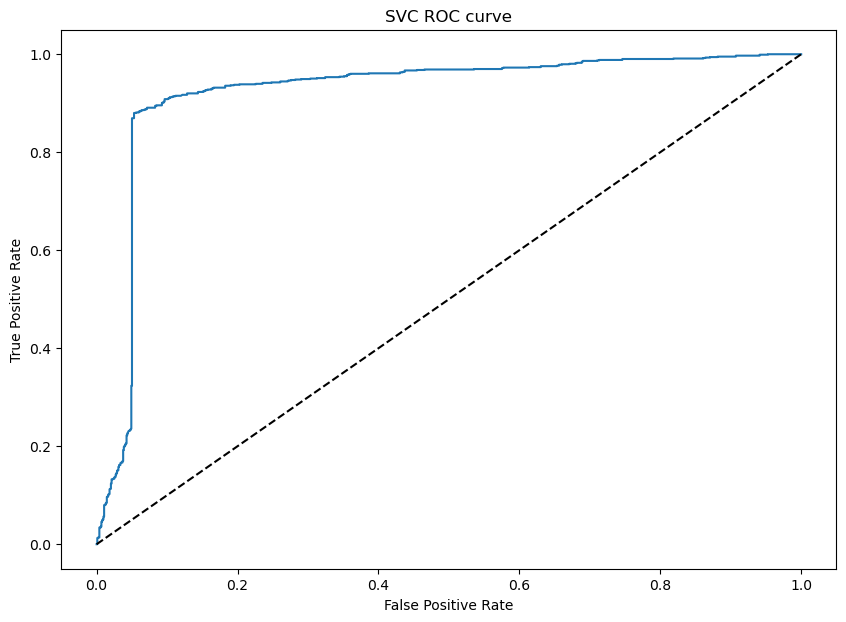

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, SVC_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('SVC ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

##  6. DecisionTreeClassifier

### Create the Model

In [ ]:
dtmodel = DecisionTreeClassifier()

### Train the Model

In [ ]:
dtmodel = dtmodel.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.9444444444444444
precision_score : 0.8177215189873418
f1_score : 0.8765264586160109
f2_score : 0.9160521837776519
accuracy_score : 0.8676042677012609
ROC_AUC Score: 0.8763636101208088


# Models comparison

In [ ]:
compare_models = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_XG,A_KNN,A_SVC,A_dt],'Recall':[r_lgt,r_rf, r_XG,r_KNN,r_SVC,r_dt],'Precision':[p_lgt, p_rf, p_XG,p_KNN,p_SVC,p_dt], 'f1_score':[f1_lgt, f1_rf, f1_XG,f1_KNN,f1_SVC,f1_dt], 'f2_score':[f2_lgt,f2_rf,f2_XG,f2_KNN,f2_SVC,f2_dt],'ROC_AUC':[acu_lgt, acu_rf, acu_XG,acu_KNN,acu_SVC,acu_dt],'Description':['','best model','','','','']}
result=pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.760427,0.793372,0.742701,0.767201,0.782692,0.761620,
Randomforest,0.898157,0.952242,0.858524,0.902957,0.931896,0.902747,best model
XGBClassifier,0.859360,0.928850,0.814530,0.867942,0.903489,0.866346,
K Nearest Neighbors,0.777886,0.864522,0.735489,0.794803,0.835217,0.786553,
Support Vector Machines,0.887973,0.923002,0.861692,0.891294,0.910052,0.889829,
DecisionTreeClassifier,0.867604,0.944444,0.817722,0.876526,0.916052,0.876364,


After train split test the best model is Randomforest. But that won't be the conclusion for the best model unless after cross validation.

# k-Fold cross validation 

## 1. Logistic Regression

## 2. RandomForest Classifier (Best Model)

In [ ]:
kf_RF = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(RF_model, X_train, y_train, cv=kf_RF, scoring='f1', error_score="raise")
RF_cv_score = score.mean()
RF_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', RF_cv_score)
print('Cross Validation f1 standard deviation: ', RF_cv_stdev)

Cross Validation f1 scores are: [0.88617886 0.88323188 0.89162273 0.88377445 0.87016734]
Average Cross Validation f1 score:  0.8829950522059136
Cross Validation f1 standard deviation:  0.007902329117110772


# Model Improvement

# Hyperparameters tuning

# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. DecisionTree Classifier



## 1. RandomForest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

In [ ]:
# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [ ]:
# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72,
                                          80]},
             scoring='f1', verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [ ]:
RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = None,
                                    max_features = 'auto',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 22)
# RF_model_tuned = RandomForestClassifier()

In [ ]:
# performance evaluation the test data

RF_model_tuned.fit(X_train, y_train)
y_pred_grid = RF_model_tuned.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       921
           1       0.95      0.85      0.90      1141

    accuracy                           0.89      2062
   macro avg       0.89      0.90      0.89      2062
weighted avg       0.90      0.89      0.89      2062



There is not much difference in the model performance after hyperparameter tuning

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(RF_model_tuned, f)

In [ ]:
X_new.to_csv('data.csv', index=False)

In [ ]:
import pickle

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(Scaler, f)

# 2. Support Vector Machine

In [ ]:
# create param grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
# make  GridSearchCV object
grid = GridSearchCV(SVC_model,
                    param_grid,
                    cv = kf_SVC,
                    refit=True,verbose=2,scoring = 'f1')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=  44.5s
[CV] END .....................................C=0.1, gamma=1; total time=  43.7s
[CV] END .....................................C=0.1, gamma=1; total time=  44.0s
[CV] END .....................................C=0.1, gamma=1; total time=  43.1s
[CV] END .....................................C=0.1, gamma=1; total time=  44.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=  27.9s
[CV] END ...................................C=0.1, gamma=0.1; total time=  29.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  30.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  31.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  28.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=  31.4s
[CV] END ..................................C=0.1

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(C=51, gamma=1, probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='f1', verbose=2)

In [ ]:
print(grid.best_estimator_) 

SVC(C=10, gamma=1, probability=True)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
# performance evaluation on test data
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1036
           1       0.86      0.92      0.89      1026

    accuracy                           0.89      2062
   macro avg       0.89      0.89      0.89      2062
weighted avg       0.89      0.89      0.89      2062



There is not much difference in the model performance after hyperparameter tuning

# 3. DecisionTree Classifier

In [ ]:
depth = np.arange(1,50)
leaves = [1,2,4,5,10,20,30,40,80,150]

In [ ]:
# create the parameter grid

params = {
          'max_depth':depth,
          'min_samples_leaf':leaves,
          'min_samples_split':[2,3,4,5],
          'criterion':['gini','entropy'] 
}

In [ ]:
# make  GridSearchCV object
grid_search = GridSearchCV(estimator = dtmodel, 
                           param_grid = params, 
                           cv = kf_dt, verbose = 1, scoring = 'f1', n_jobs = -1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3920 candidates, totalling 19600 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                              150],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1', verbose=1)

In [ ]:
score = pd.DataFrame(grid_search.cv_results_)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018145,0.003082,0.006437,0.004473,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
1,0.016104,0.004215,0.008044,0.003113,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
2,0.016022,0.002726,0.007312,0.004687,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
3,0.015316,0.004491,0.009657,0.000814,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
4,0.012120,0.003164,0.008080,0.003132,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.723714,0.735361,0.731532,0.728271,0.742334,0.732242,0.006334,3841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,0.043918,0.004503,0.008473,0.003218,entropy,49,80,5,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.787429,0.788304,0.738012,0.779904,0.783019,0.775334,0.018907,1754
3916,0.041942,0.004282,0.004448,0.004677,entropy,49,150,2,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555
3917,0.039950,0.000862,0.006051,0.004220,entropy,49,150,3,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555
3918,0.038494,0.003405,0.006608,0.001875,entropy,49,150,4,"{'criterion': 'entropy', 'max_depth': 49, 'min...",0.771891,0.778291,0.741806,0.781358,0.778157,0.770300,0.014576,2555


In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 36,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=36)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=36, min_samples_leaf=1,
                       min_samples_split=2)

In [ ]:
# performance evaluation on test data
dt.fit(X_train, y_train)
y_pred_grid_dt = dt.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       928
           1       0.95      0.86      0.90      1134

    accuracy                           0.90      2062
   macro avg       0.90      0.90      0.90      2062
weighted avg       0.91      0.90      0.90      2062



There is a difference in the model performance after hyperparameter tuning. The model F1 score increased after tuning

# Using Confusion Matrix For Predictions


# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. DecisionTree Classifier



# 1. RandomForerestClassifier

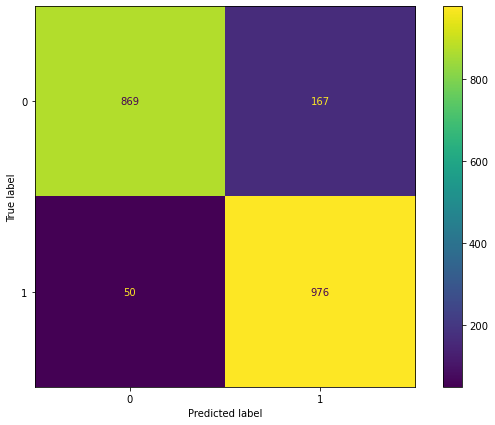

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 869 customers who don't churn and 976 who churn
2. There are 167 customers who are predicted to churn when they actually won't
3. There are 50 customers who are predicted to not churn when they actually churn

# 2. Support Vector Machine

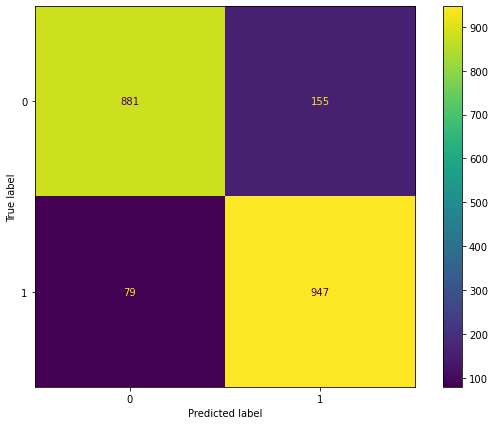

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_SVC = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVC, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 881 customers who don't churn and 947 who churn
2. There are 155 customers who are predicted to churn when they actually won't
3. There are 79 customers who are predicted to not churn when they actually churn

# 3. DecisionTree Classifier

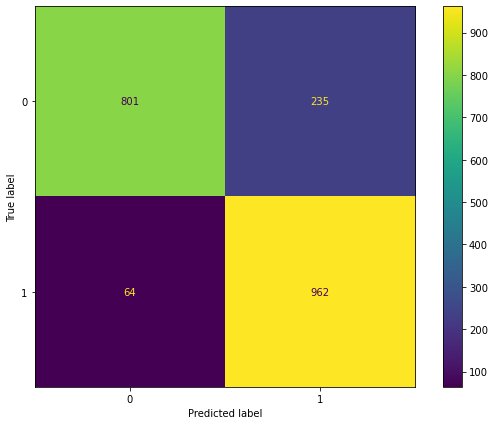

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_dt = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 801 customers who don't churn and 962 who churn
2. There are 235 customers who are predicted to churn when they actually won't
3. There are 64 customers who are predicted to not churn when they actually churn

# Feature Importance

# 1.  RandomforestClassifier 

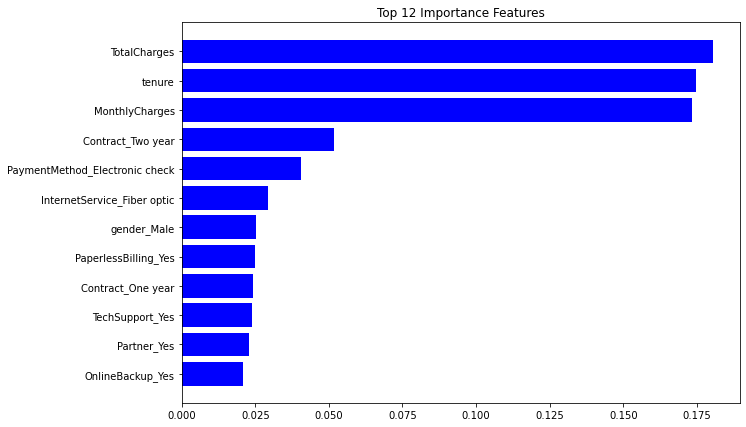

In [ ]:
coeffs = RF_model_tuned.feature_importances_
list_of_coeffs = list(sorted(zip(coeffs, X_train.columns), reverse=True))
x_val = [x[0] for x in list_of_coeffs[:12]]
y_val = [x[1] for x in list_of_coeffs[:12]]

#create figure
plt.figure(figsize=(10,7))
plt.barh( y_val, x_val, align='center', color='blue')
plt.title('Top 12 Importance Features')
plt.gca().invert_yaxis() # first with higest contributed one 
plt.show()

# 2.  DecisionTreeClassifier

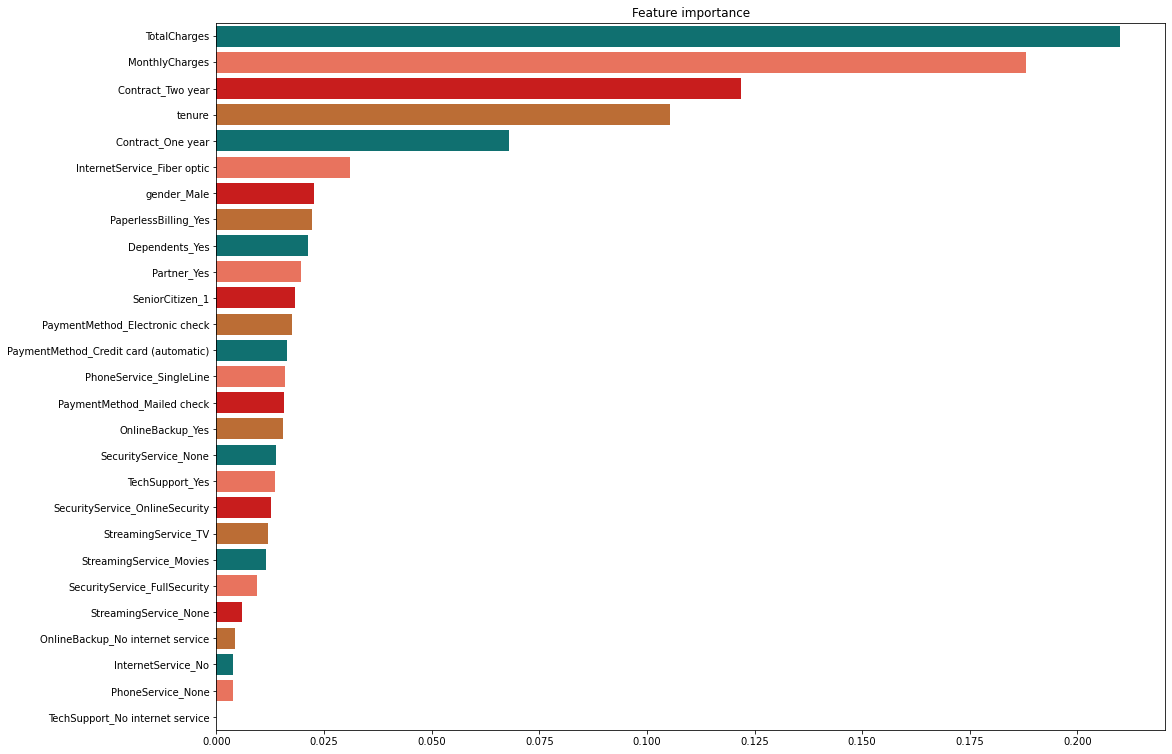

In [ ]:
fimp = pd.Series(data=dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


# Conclusion

Looking at model results, the best Precision on the test set is achieved by  RandomForest Classifier with 0.89 . 

Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best 

score on jointly precision and recall. This would also be the  RandomForest Classifier with a F1 score of 0.90 .

Given the scores of the best performing models, it can be observed that F1 scores are not much above 90%. 

Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more 

business value.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their Month-to-month

customers.

What kind of incentives can this company offer to customers to get them to sign One-year or Two-year contracts?

What adjustments can be made to Month-to-Month contracts that would be more favorable to customers, without taking away the

appeal of a One-year or Two-year contract?

For RandomForest Classifier, you can see TotalCharges has a positive influence on the data and some features like

InternetService_fibreoptics,contract_one year and etc should be examine critically since it has negative impact on the target column.

 Recommendation and Request

We should pay more attention to customers who meet the criteria below

1. Contract: Month-to-month
2. Tenure: Short tenure
3. Internet service: Fiber optic
4. Payment method: Electronic check